# Setup

In [7]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

#load data
df = pd.read_csv('../data/raw/baseline.csv')

print(f"Dataset shape --> {df.shape}")
print(f"Target Distribution --> {df['defect'].value_counts()}")


Dataset shape --> (6052, 23)
Target Distribution --> defect
0    3026
1    3026
Name: count, dtype: int64


# Features and Target

In [8]:
feature_cols = [col for col in df.columns if col not in ['SHA', 'defect']]
target_col = 'defect'

print(f"Number of features: {len(feature_cols)}")
print(f" Feature Names: {feature_cols}")

X = df[feature_cols]
y = df[target_col]


Number of features: 21
 Feature Names: ['cbo', 'wmc', 'dit', 'rfc', 'lcom', 'totalMethods', 'totalFields', 'nosi', 'loc', 'returnQty', 'loopQty', 'comparisonsQty', 'tryCatchQty', 'parenthesizedExpsQty', 'stringLiteralsQty', 'numbersQty', 'assignmentsQty', 'mathOperationsQty', 'variablesQty', 'maxNestedBlocks', 'uniqueWordsQty']


In [9]:
# Summary stats
df[feature_cols].describe()


,cbo,wmc,dit,rfc,lcom,totalMethods,totalFields,nosi,loc,returnQty,...,comparisonsQty,tryCatchQty,parenthesizedExpsQty,stringLiteralsQty,numbersQty,assignmentsQty,mathOperationsQty,variablesQty,maxNestedBlocks,uniqueWordsQty
count,6052.000000,6052.000000,6052.000000,6052.000000,6052.000000,6052.000000,6052.000000,6052.000000,6052.000000,6052.000000,...,6052.000000,6052.000000,6052.000000,6052.000000,6052.000000,6052.000000,6052.000000,6052.000000,6052.000000,6052.000000
mean,27.493721,86.177958,4.599141,68.954395,1242.030238,33.497852,14.049405,5.945142,442.074190,25.410112,...,18.859220,3.218275,5.267845,36.727859,31.120621,65.899042,15.794118,49.700430,5.041143,219.283212
std,33.214827,136.077153,9.288447,85.771623,9449.009245,53.556999,26.051029,25.263058,681.566084,47.058370,...,36.588716,8.569417,13.956639,118.995663,85.715467,101.501174,40.011677,72.531059,5.920991,267.134701
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,9.000000,18.000000,1.000000,18.000000,4.000000,8.000000,3.000000,0.000000,93.000000,4.000000,...,2.000000,0.000000,0.000000,3.000000,2.000000,13.000000,1.000000,10.000000,2.000000,74.000000
50%,18.000000,45.000000,2.000000,44.000000,43.000000,17.000000,7.000000,0.000000,230.000000,12.000000,...,7.000000,1.000000,1.000000,12.000000,9.000000,34.000000,4.000000,27.000000,4.000000,139.000000
75%,34.000000,100.000000,4.000000,89.000000,267.000000,39.000000,18.000000,3.000000,521.250000,28.000000,...,22.000000,3.000000,5.000000,34.000000,29.000000,80.000000,14.000000,62.000000,6.000000,269.000000
max,419.000000,1714.000000,285.000000,1203.000000,199855.000000,758.000000,903.000000,475.000000,8832.000000,579.000000,...,799.000000,125.000000,218.000000,4566.000000,2856.000000,2016.000000,501.000000,1050.000000,77.000000,3345.000000


Top 10 features correlated with defect:
nosi               0.167073
dit                0.066680
cbo                0.063791
rfc                0.023443
maxNestedBlocks    0.004382
comparisonsQty     0.002773
uniqueWordsQty     0.002533
wmc                0.002313
assignmentsQty     0.002284
variablesQty       0.002258
dtype: float64


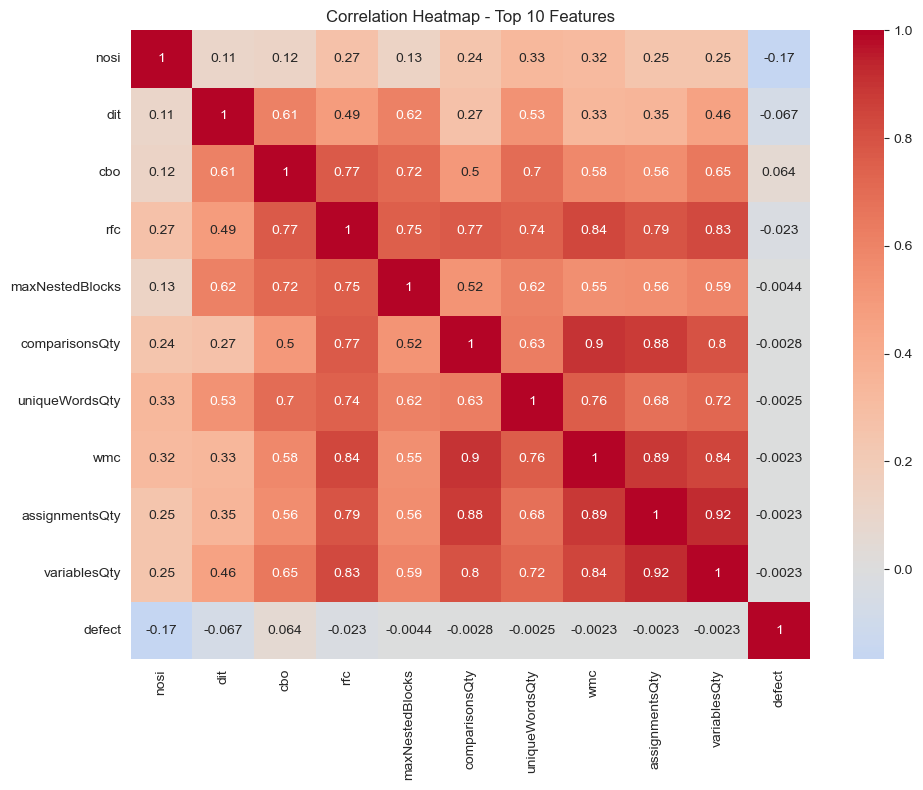

In [10]:
# Correlation with target
correlations = df[feature_cols].corrwith(df['defect']).abs().sort_values(ascending=False)

print("Top 10 features correlated with defect:")
print(correlations.head(10))

# Heatmap of top 10 features
top_features = correlations.head(10).index.tolist()
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_features + ['defect']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap - Top 10 Features')
plt.tight_layout()
plt.show()


Top 10 Features with Defect
nosi               0.167073
dit                0.066680
cbo                0.063791
rfc                0.023443
maxNestedBlocks    0.004382
comparisonsQty     0.002773
uniqueWordsQty     0.002533
wmc                0.002313
assignmentsQty     0.002284
variablesQty       0.002258
dtype: float64
Heatmap saved to: reports/figures/correlation_heatmap.png


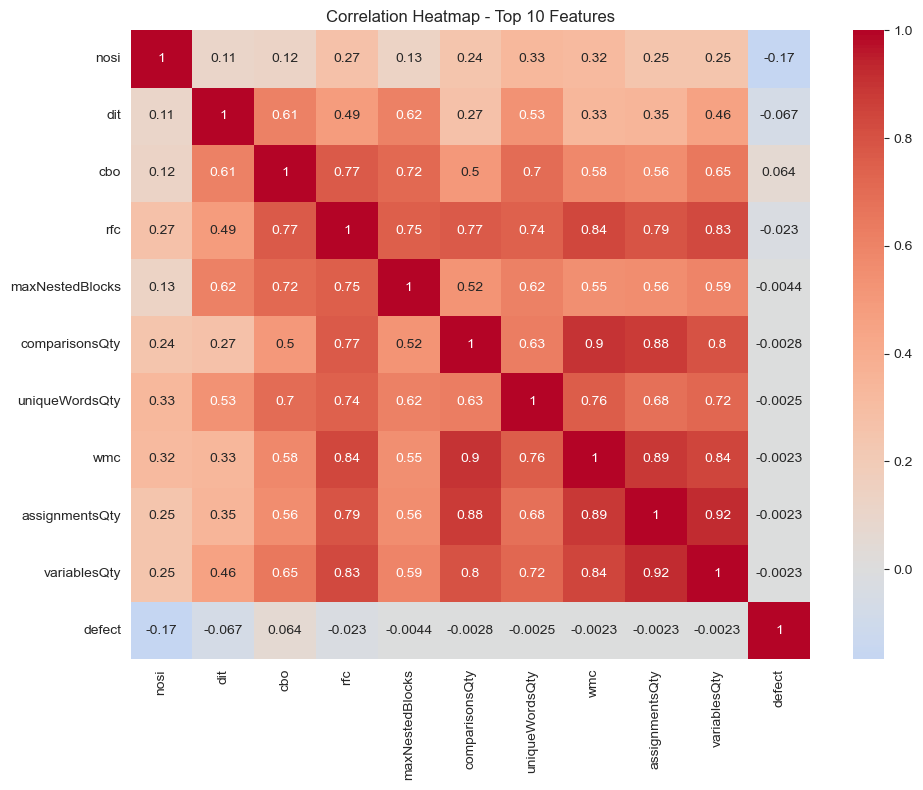

In [14]:
import os
os.makedirs('../reports/figures', exist_ok=True)
correlations = df[feature_cols].corrwith(df['defect']).abs().sort_values(ascending=False)

print("Top 10 Features with Defect")
print(correlations.head(10))

# Heatmap of top 10 features
top_features = correlations.head(10).index.tolist()
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_features + ['defect']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap - Top 10 Features')
plt.tight_layout()

# Save the figure
plt.savefig('../reports/figures/correlation_heatmap.png', dpi=300, bbox_inches='tight')
print("Heatmap saved to: reports/figures/correlation_heatmap.png")

# Distribution of top 3 features

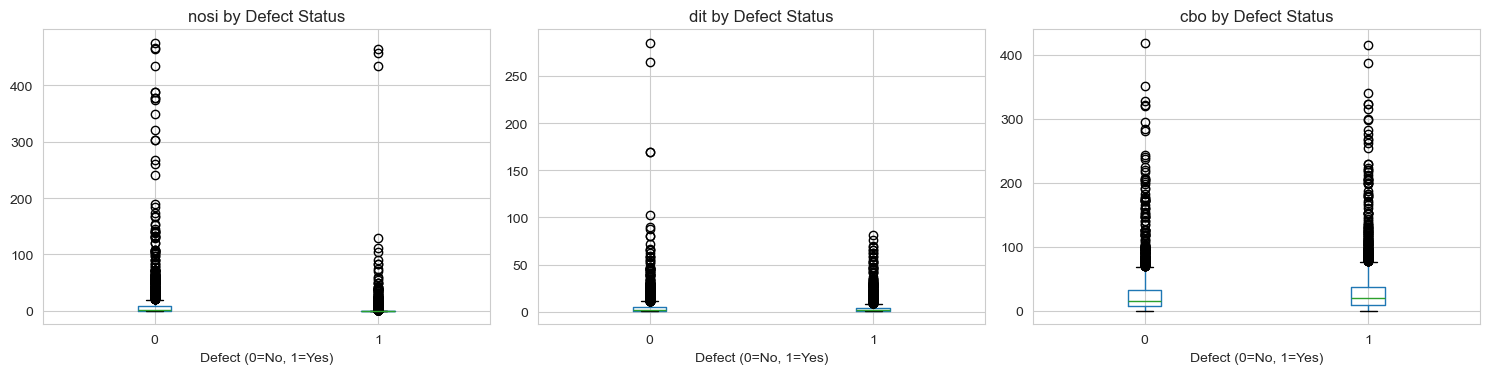

In [11]:
# Plot top 3 features
top_3 = correlations.head(3).index.tolist()

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, feature in enumerate(top_3):
    df.boxplot(column=feature, by='defect', ax=axes[i])
    axes[i].set_title(f'{feature} by Defect Status')
    axes[i].set_xlabel('Defect (0=No, 1=Yes)')
    
plt.suptitle('')
plt.tight_layout()
plt.show()


# Summary

In [13]:
print("="*60)
print("EDA SUMMARY")
print("="*60)
print(f"Dataset is clean - no missing values")
print(f"Perfectly balanced - 50/50 split")
print(f"21 numeric features ready to use")
print(f"Top correlated features identified")



EDA SUMMARY
Dataset is clean - no missing values
Perfectly balanced - 50/50 split
21 numeric features ready to use
Top correlated features identified
